In [5]:
!pip install praw
!pip install wordcloud
import praw
import pandas as pd
import numpy as np
import re #RegEx : Regular expression
user_agent = 'to fetch and analysis'
reddit = praw.Reddit(
 client_id = '6fx2pfa7_lNbIr7qlI9y6A',
  client_secret = '230-pSd-ILe2bDbIcIeSVFKLw3DK2A',
 user_agent=user_agent
)

In [6]:
def headlines(p_name):
    # Define the subreddit you want to search in
    subreddit = reddit.subreddit('politics')

    # Define the hashtag you want to search for
    hashtag = f'#{p_name}'
    headlines = set()
    # Search for submissions containing the hashtag
    for submission in subreddit.search(hashtag, time_filter='all', limit=500):
        headlines.add(submission.title)
    return headlines

In [7]:
def preprocess_text(p_name):
    headlines_set = headlines(p_name)

    # Convert the set of headlines into a list
    headlines_list = list(headlines_set)

    # Preprocess each headline
    preprocessed_headlines = []
    for headline in headlines_list:
        # Remove URLs, HTML tags, emojis, and emoticons using regex
        text = re.sub(r'http\S+|www\S+|<[^>]*>|[\U00010000-\U0010ffff]', '', headline)

        # Remove punctuation and special characters using regex
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

        # Remove short words (length < 3) and long words (length > 15) using regex
        text = re.sub(r'\b\w{1,2}\b|\b\w{16,}\b', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        preprocessed_headlines.append(text)

    return preprocessed_headlines

In [8]:
# appending all the headlines scrapped into a dataframe for a specific politician
df_biden = pd.DataFrame(preprocess_text("biden"), columns=['Headline'])
df_trump = pd.DataFrame(preprocess_text("trump"), columns=['Headline'])
df_kennedy = pd.DataFrame(preprocess_text("kennedy"), columns=['Headline'])
df_west = pd.DataFrame(preprocess_text("west"), columns=['Headline'])
df_stein = pd.DataFrame(preprocess_text("stein"), columns=['Headline'])

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [9]:
print(df_biden.describe())

                                                 Headline
count                                                 236
unique                                                236
top     Trump privately discussed Biden impeachment wi...
freq                                                    1


In [10]:
print(df_trump.describe())

                                   Headline
count                                   243
unique                                  243
top     Court limits Trump social media use
freq                                      1


In [11]:
print(df_kennedy.describe())

                                                 Headline
count                                                 229
unique                                                229
top     Sanders calls for more justices like Sotomayor...
freq                                                    1


In [12]:
print(df_west.describe())

                                                 Headline
count                                                 228
unique                                                228
top     Joe Manchins Argument Far Removed From Reality...
freq                                                    1


In [13]:
print(df_stein.describe())

                                                 Headline
count                                                 207
unique                                                205
top     Jill Stein Green Party not blame for Trumps el...
freq                                                    2


In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_word_cloud(headline_df):
    text = ' '.join(headline_df['Headline'])  # Concatenate all texts from the specified column
    # Generate word cloud
    wordcloud = WordCloud(width=1000, height=600, max_words=100,
                          stopwords=STOPWORDS,
                          background_color="black").generate(text)
    # Display the generated image
    plt.figure(figsize=(20, 10), facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

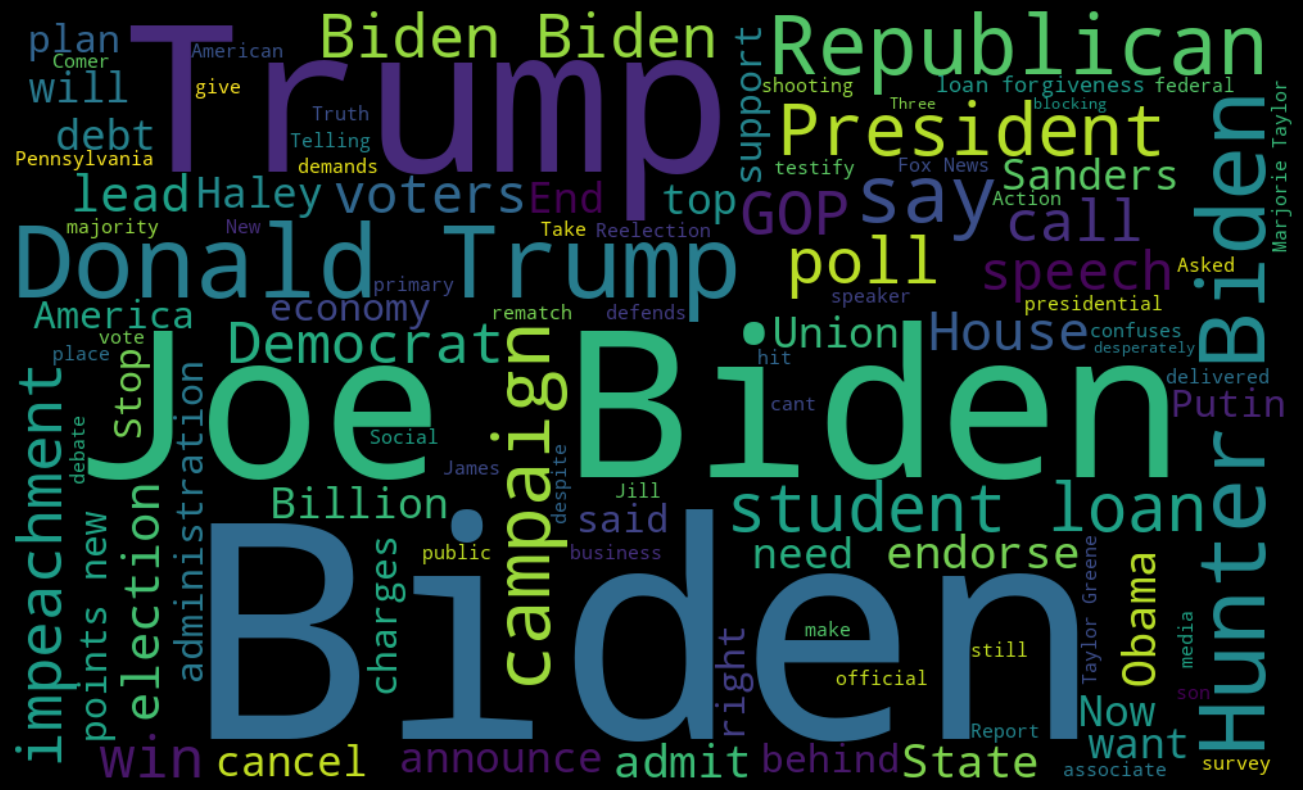

In [15]:
# Call the function with BIDEN DataFrame
generate_word_cloud(df_biden)

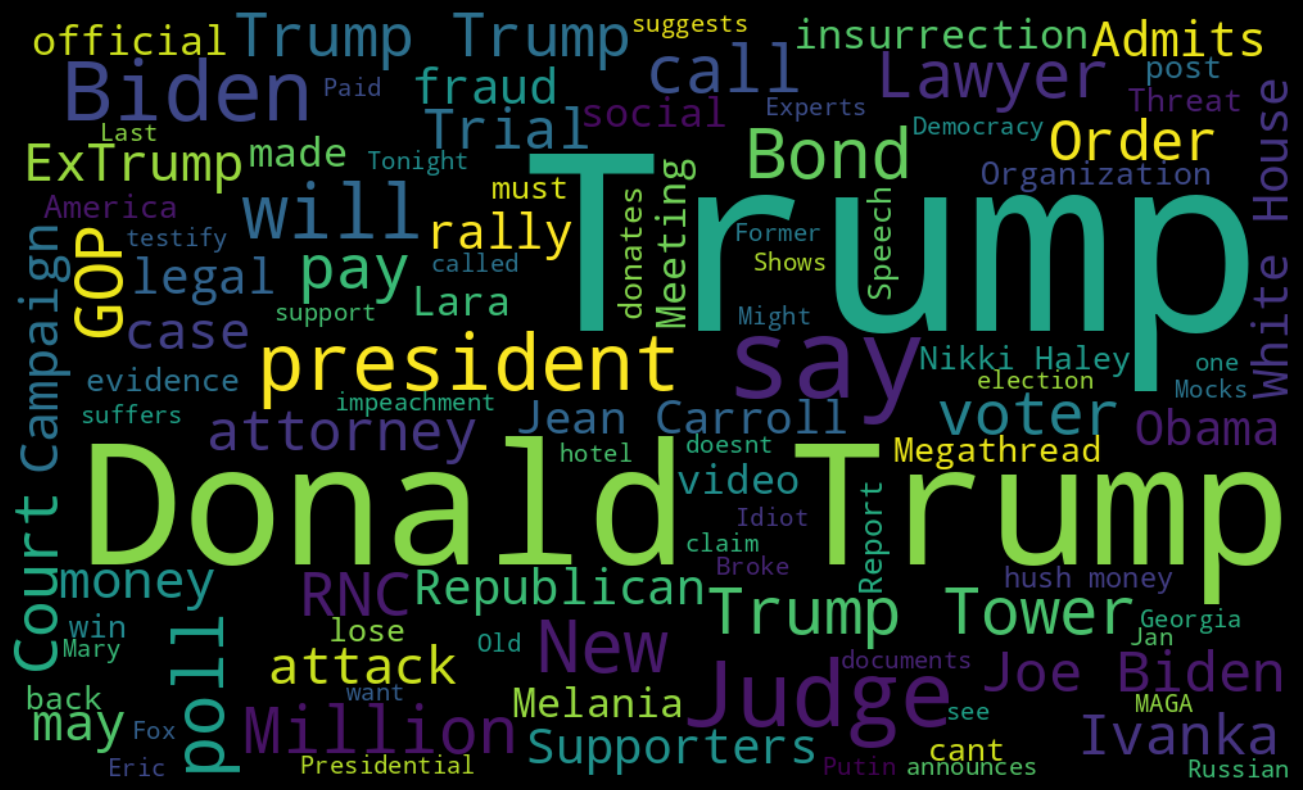

In [16]:
# Call the function with TRUMP DataFrame
generate_word_cloud(df_trump)

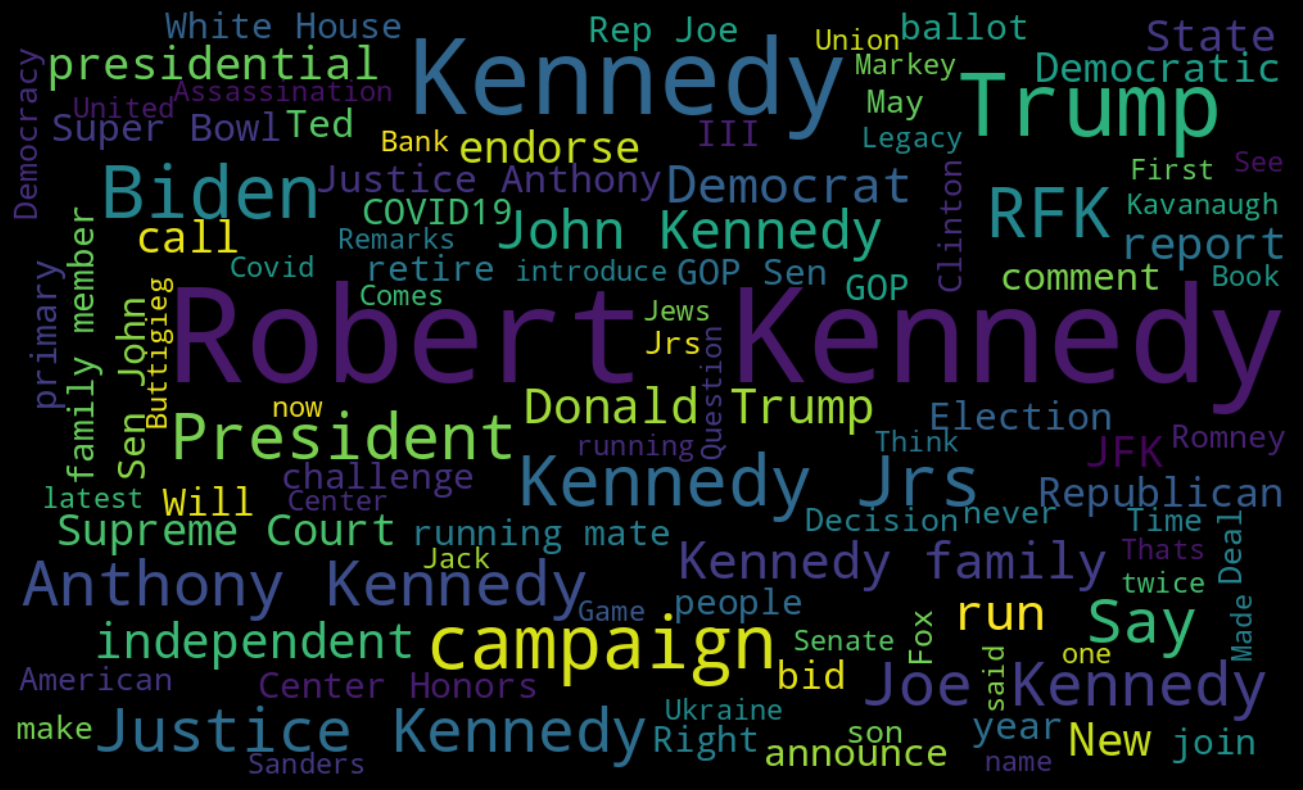

In [17]:
# Call the function with KENNEDY DataFrame
generate_word_cloud(df_kennedy)

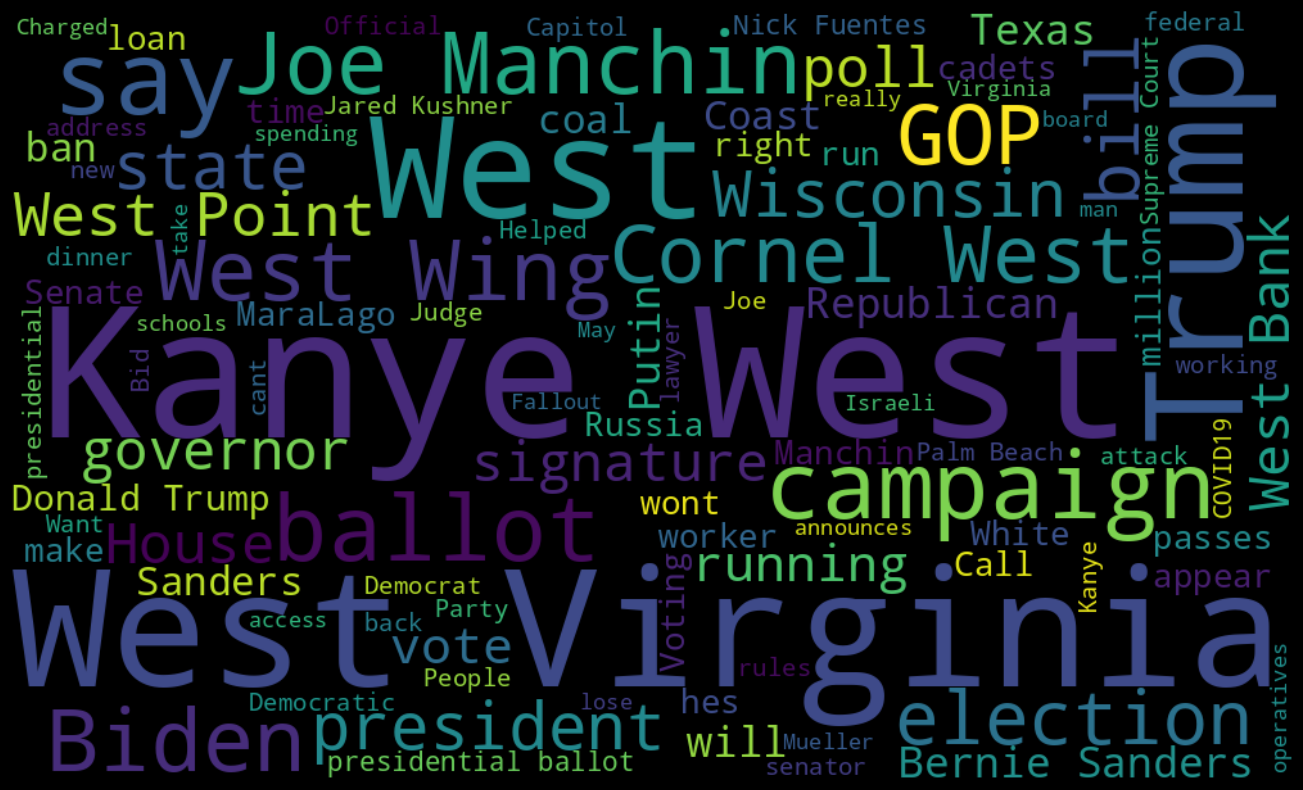

In [18]:
# Call the function with WEST DataFrame
generate_word_cloud(df_west)

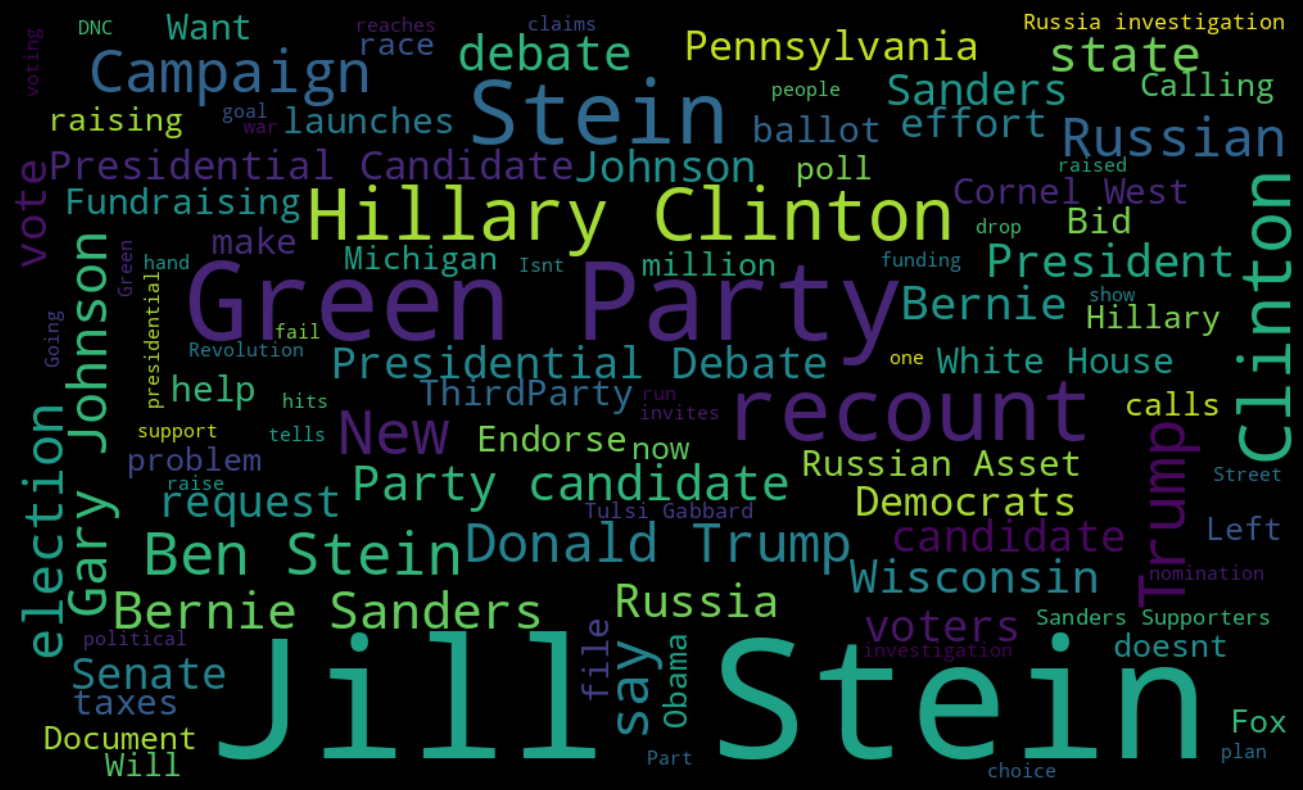

In [20]:
# Call the function with STEIN DataFrame
generate_word_cloud(df_stein)

In [21]:
!pip install textblob
from textblob import TextBlob


#function to calculate the subjectivity
def getSubjectivity(text):
 return TextBlob(text).sentiment.subjectivity

#function to calculate the Polarity
def getPolarity(text):
 return TextBlob(text).sentiment.polarity

In [22]:
#adding the score of respective politician to the respective df

#BIDEN
df_biden['Subjectivity'] = df_biden['Headline'].apply(getSubjectivity)
df_biden['Polarity'] = df_biden['Headline'].apply(getPolarity)
df_biden.head()

# TRUMP
df_trump['Subjectivity'] = df_trump['Headline'].apply(getSubjectivity)
df_trump['Polarity'] = df_trump['Headline'].apply(getPolarity)
df_trump.head()

# KENNEDY
df_kennedy['Subjectivity'] = df_kennedy['Headline'].apply(getSubjectivity)
df_kennedy['Polarity'] = df_kennedy['Headline'].apply(getPolarity)
df_kennedy.head()

# WEST
df_west['Subjectivity'] = df_west['Headline'].apply(getSubjectivity)
df_west['Polarity'] = df_west['Headline'].apply(getPolarity)
df_west.head()

# STEIN
df_stein['Subjectivity'] = df_stein['Headline'].apply(getSubjectivity)
df_stein['Polarity'] = df_stein['Headline'].apply(getPolarity)
df_stein.head()

,Headline,Subjectivity,Polarity
0,Jill Stein enlisted help build Cornel Wests th...,0.0,0.0
1,Jill Stein says refusal cooperate with Russia ...,0.0,0.0
2,Stein hits Clinton emails Voters owed explanation,0.0,0.0
3,Green Partys Jill Stein What Fear from Donald ...,0.3,-0.2
4,Hillary Clinton the problem she not the soluti...,0.3,-0.2


In [23]:
#Group the range of Polarity into different categories
def getInsight(score):
 if score < 0:
     return "Negative"
 elif score == 0:
     return "Neutral"
 else:
     return "Positive"

#adding the Insight score of respective politician to the respective df

#BIDEN
df_biden['Sub_Insight'] = df_biden["Subjectivity"].apply(getInsight)
df_biden['Pol_Insight'] = df_biden["Polarity"].apply(getInsight)
df_biden.head()

# TRUMP
df_trump['Sub_Insight'] = df_trump["Subjectivity"].apply(getInsight)
df_trump['Pol_Insight'] = df_trump["Polarity"].apply(getInsight)
df_trump.head()

# KENNEDY
df_kennedy['Sub_Insight'] = df_kennedy["Subjectivity"].apply(getInsight)
df_kennedy['Pol_Insight'] = df_kennedy["Polarity"].apply(getInsight)
df_kennedy.head()

# WEST
df_west['Sub_Insight'] = df_west["Subjectivity"].apply(getInsight)
df_west['Pol_Insight'] = df_west["Polarity"].apply(getInsight)
df_west.head()

# STEIN
df_stein['Sub_Insight'] = df_stein["Subjectivity"].apply(getInsight)
df_stein['Pol_Insight'] = df_stein["Polarity"].apply(getInsight)
df_stein.head()



,Headline,Subjectivity,Polarity,Sub_Insight,Pol_Insight
0,Jill Stein enlisted help build Cornel Wests th...,0.0,0.0,Neutral,Neutral
1,Jill Stein says refusal cooperate with Russia ...,0.0,0.0,Neutral,Neutral
2,Stein hits Clinton emails Voters owed explanation,0.0,0.0,Neutral,Neutral
3,Green Partys Jill Stein What Fear from Donald ...,0.3,-0.2,Positive,Negative
4,Hillary Clinton the problem she not the soluti...,0.3,-0.2,Positive,Negative


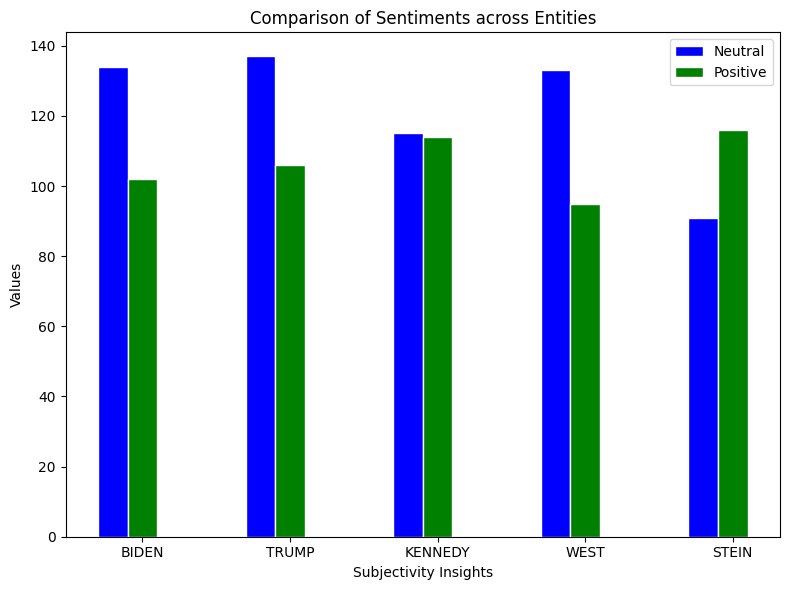

In [24]:
import matplotlib.pyplot as plt
import numpy as np

neu_combined = [df_biden[df_biden['Sub_Insight'] == 'Neutral']['Sub_Insight'].value_counts().iloc[0],
                df_trump[df_trump['Sub_Insight'] == 'Neutral']['Sub_Insight'].value_counts().iloc[0],
                df_kennedy[df_kennedy['Sub_Insight'] == 'Neutral']['Sub_Insight'].value_counts().iloc[0],
                df_west[df_west['Sub_Insight'] == 'Neutral']['Sub_Insight'].value_counts().iloc[0],
                df_stein[df_stein['Sub_Insight'] == 'Neutral']['Sub_Insight'].value_counts().iloc[0]]


pos_combined = [df_biden[df_biden['Sub_Insight'] == 'Positive']['Sub_Insight'].value_counts().iloc[0],
                df_trump[df_trump['Sub_Insight'] == 'Positive']['Sub_Insight'].value_counts().iloc[0],
                df_kennedy[df_kennedy['Sub_Insight'] == 'Positive']['Sub_Insight'].value_counts().iloc[0],
                df_west[df_west['Sub_Insight'] == 'Positive']['Sub_Insight'].value_counts().iloc[0],
                df_stein[df_stein['Sub_Insight'] == 'Positive']['Sub_Insight'].value_counts().iloc[0]]

# Labels for the x-axis
labels = ["BIDEN","TRUMP","KENNEDY","WEST","STEIN"]

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]
# r3 = [x + bar_width for x in r2]

# Create the bar plots
plt.figure(figsize=(8, 6))

# Loop through each sentiment list and plot its corresponding bar graph
plt.bar(r1, neu_combined, color='b', width=bar_width, edgecolor='white', label='Neutral')
plt.bar(r2, pos_combined, color='g', width=bar_width, edgecolor='white', label='Positive')

# Add labels and title
plt.xlabel('Subjectivity Insights')
plt.ylabel('Values')
plt.title('Comparison of Sentiments across Entities')
plt.xticks([r + bar_width for r in range(len(labels))], labels)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [25]:
def calculate_percentage(a,b):
    total = a+b
    neg_percen = (a/total)* 100
    pos_percen = (b/total)* 100
    print(neg_percen,pos_percen)

biden_li = calculate_percentage(neu_combined[0],pos_combined[0])
# labels = ["BIDEN","TRUMP","KENNEDY","WEST","STEIN"]

56.779661016949156 43.22033898305085


In [26]:
trump_li = calculate_percentage(neu_combined[1],pos_combined[1])

56.37860082304527 43.62139917695473


In [27]:
kennedy_li = calculate_percentage(neu_combined[2],pos_combined[2])

50.21834061135371 49.78165938864629


In [28]:
west_li = calculate_percentage(neu_combined[3],pos_combined[3])

58.333333333333336 41.66666666666667


In [29]:
stein_li = calculate_percentage(neu_combined[4],pos_combined[4])

43.96135265700483 56.038647342995176


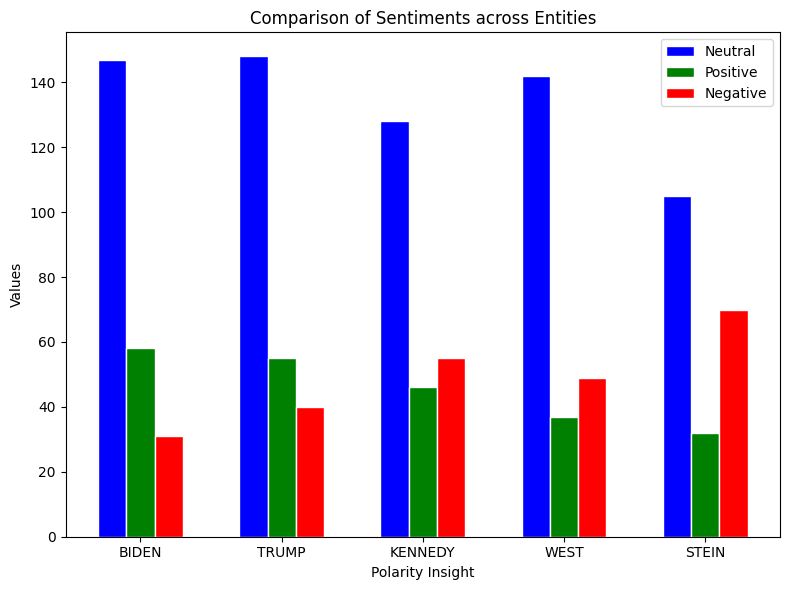

In [30]:
import matplotlib.pyplot as plt
import numpy as np

neu_combined = [len(df_biden[df_biden['Pol_Insight'] == 'Neutral']),
                len(df_trump[df_trump['Pol_Insight'] == 'Neutral']),
                len(df_kennedy[df_kennedy['Pol_Insight'] == 'Neutral']),
                len(df_west[df_west['Pol_Insight'] == 'Neutral']),
                len(df_stein[df_stein['Pol_Insight'] == 'Neutral'])]

neg_combined = [len(df_biden[df_biden['Pol_Insight'] == 'Negative']),
                len(df_trump[df_trump['Pol_Insight'] == 'Negative']),
                len(df_kennedy[df_kennedy['Pol_Insight'] == 'Negative']),
                len(df_west[df_west['Pol_Insight'] == 'Negative']),
                len(df_stein[df_stein['Pol_Insight'] == 'Negative'])]

pos_combined = [len(df_biden[df_biden['Pol_Insight'] == 'Positive']),
                len(df_trump[df_trump['Pol_Insight'] == 'Positive']),
                len(df_kennedy[df_kennedy['Pol_Insight'] == 'Positive']),
                len(df_west[df_west['Pol_Insight'] == 'Positive']),
                len(df_stein[df_stein['Pol_Insight'] == 'Positive'])]


# Labels for the x-axis
labels = ["BIDEN","TRUMP","KENNEDY","WEST","STEIN"]

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width * 2 for x in r1]  # Separate x positions for negative bars

# Create the bar plots
plt.figure(figsize=(8, 6))

# Loop through each sentiment list and plot its corresponding bar graph
plt.bar(r1, neu_combined, color='b', width=bar_width, edgecolor='white', label='Neutral')
plt.bar(r2, pos_combined, color='g', width=bar_width, edgecolor='white', label='Positive')
plt.bar(r3, neg_combined, color='r', width=bar_width, edgecolor='white', label='Negative')

# Add labels and title
plt.xlabel('Polarity Insight')
plt.ylabel('Values')
plt.title('Comparison of Sentiments across Entities')
plt.xticks([r + bar_width for r in range(len(labels))], labels)
# plt.ylim(0, 1.1)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [31]:
print(labels)
print("------------------------------")
print("neu_combined: ", neu_combined)

print("-----------------------------------")

print("neg_combined: ", neg_combined)

print("----------------------------------")

print("pos_combined: ", pos_combined)

['BIDEN', 'TRUMP', 'KENNEDY', 'WEST', 'STEIN']
------------------------------
neu_combined:  [147, 148, 128, 142, 105]
-----------------------------------
neg_combined:  [31, 40, 55, 49, 70]
----------------------------------
pos_combined:  [58, 55, 46, 37, 32]


In [32]:
def calculate_percentage(a,b,c):
    total = a+b+c
    neu_percen = (a/total)* 100
    neg_percen = (b/total)* 100
    pos_percen = (c/total)* 10
    print(neu_percen,neg_percen,pos_percen)

biden_li = calculate_percentage(neu_combined[0],neg_combined[0],pos_combined[0])

62.28813559322034 13.135593220338984 24.576271186440678


In [33]:
trump_li = calculate_percentage(neu_combined[1],neg_combined[1],pos_combined[1])

60.90534979423868 16.46090534979424 22.633744855967077


In [34]:
kennedy_li = calculate_percentage(neu_combined[2],neg_combined[2],pos_combined[2])

55.895196506550214 24.017467248908297 20.087336244541483


In [35]:
west_li = calculate_percentage(neu_combined[3],neg_combined[3],pos_combined[3])

62.28070175438597 21.49122807017544 16.228070175438596


In [36]:
stein_li = calculate_percentage(neu_combined[4],neg_combined[4],pos_combined[4])

50.72463768115942 33.81642512077295 15.458937198067632
